In [12]:
from graph.graph import graph
import matplotlib.pyplot as plt
import networkx as nx

mpl_params = {

    'figure.figsize': (25, 13),
}
plt.rcParams.update(mpl_params)
G = graph.graph

# Палитра цветов
## Соответствует типам беспилотников
## По возрастанию размера - слева направо

In [13]:
import seaborn

node_palette = seaborn.color_palette('muted', 3)
node_palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

In [14]:
edge_palette = seaborn.color_palette('pastel', 3)
edge_palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078)]

In [15]:
nodes = G.nodes()
pos = nx.get_node_attributes(G, 'pos')
nodes_types = nx.get_node_attributes(G, 'type')
edges_types = nx.get_edge_attributes(G, 'type')

# Исходный граф
## Тип ребер и вершин соответствует типу обслуживаемых беспилотников

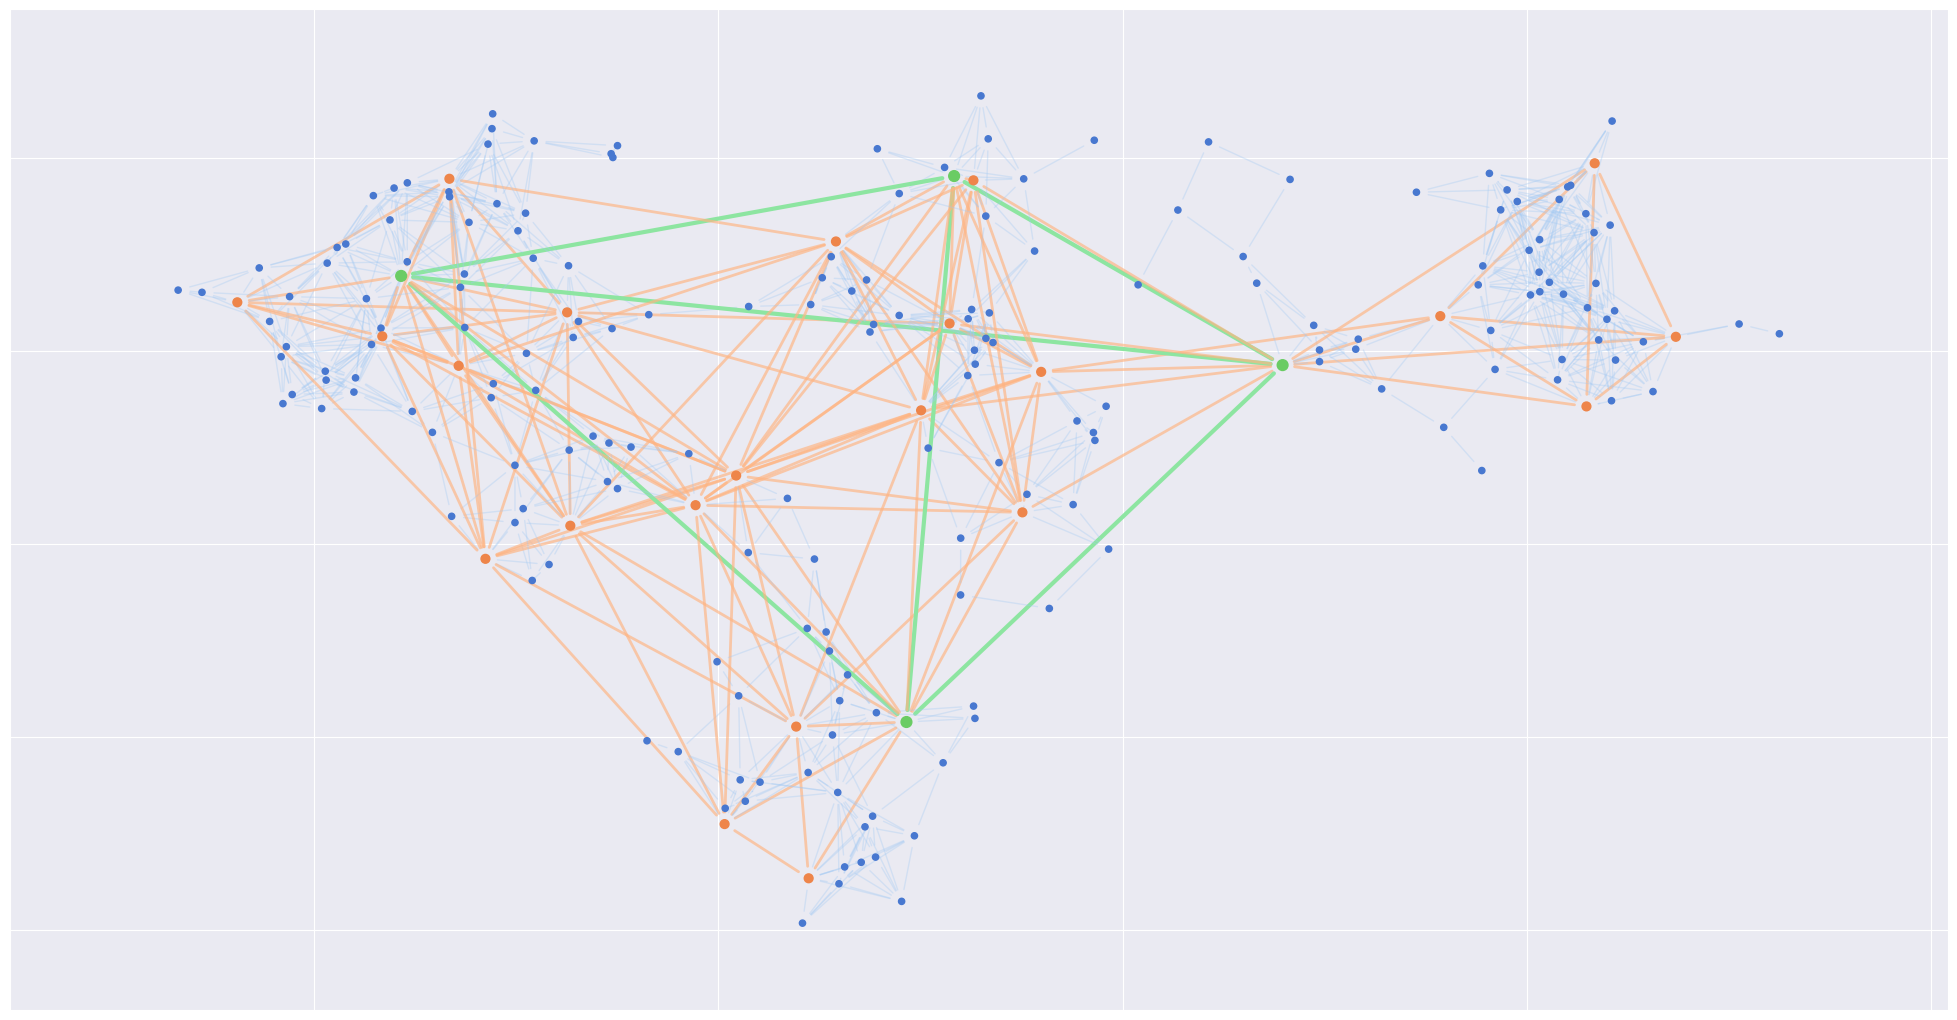

In [16]:
def draw_graph(what: str = None):
    if what == 'edges' or what is None:
        nx.draw_networkx_edges(G, pos=pos,
                               edge_color=list(map(lambda x: edge_palette[x], edges_types.values())),
                               width=list(map(lambda x: (x + 1), edges_types.values())),
                               alpha=list(map(lambda x: (x + 1) / 3, edges_types.values())),
                               arrows=True,
                               arrowstyle='-')
    if what == 'nodes' or what is None:
        nx.draw_networkx_nodes(G, pos=pos,
                               node_color=list(map(lambda x: node_palette[x], nodes_types.values())),
                               node_size=list(map(lambda x: (x + 1) * 20, nodes_types.values())))


draw_graph()

# Функция стоимости перевозки N грузов на ребрах разных типов
## При фиксированном расстоянии

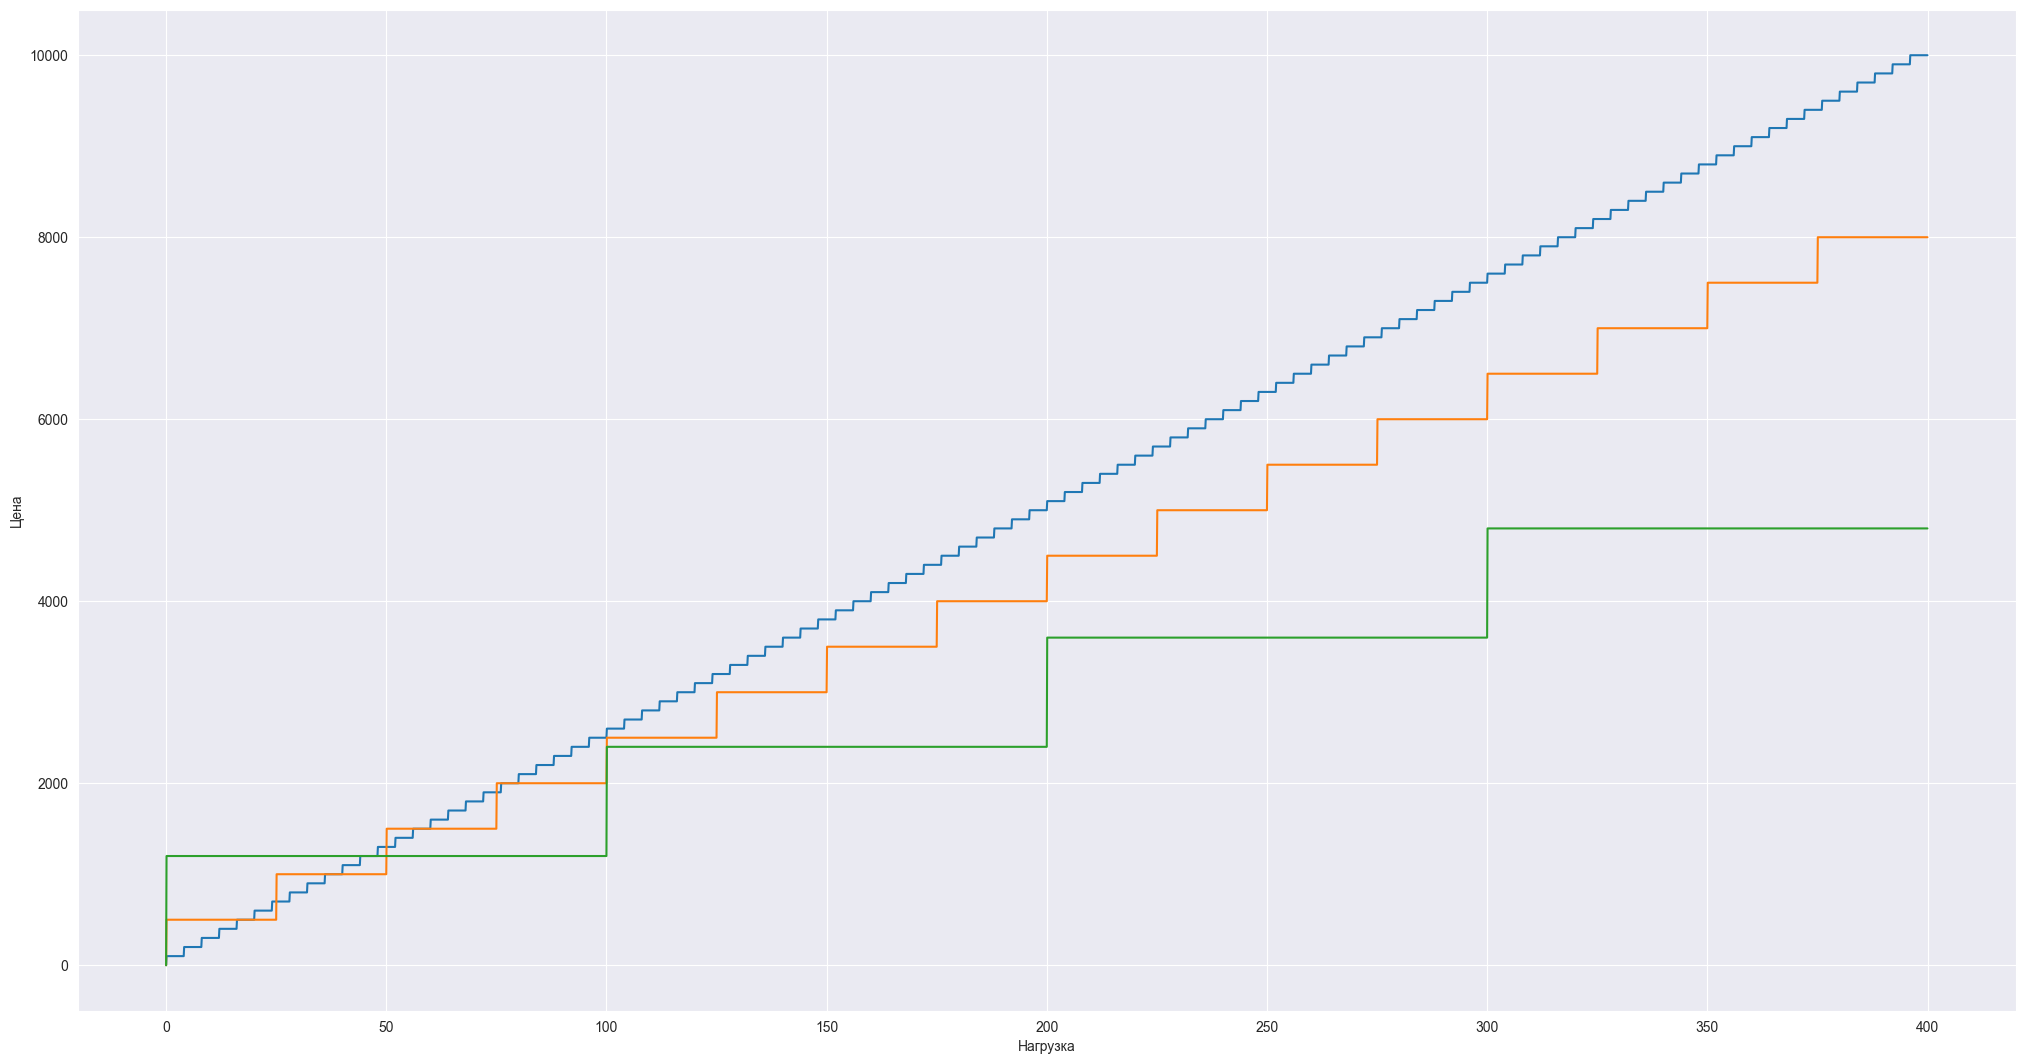

In [17]:
import numpy as np


def draw_price_function(edge_type, dist, max_payload):
    payload = np.arange(-0.01, max_payload, 0.1)
    price = np.array(graph.calc_price(edge_type, dist, payload))
    #
    plt.xlabel('Нагрузка')
    plt.ylabel('Цена')

    plt.plot(payload, price)


draw_price_function(0, 100, 400)
draw_price_function(1, 100, 400)
draw_price_function(2, 100, 400)